In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import beta
sns.set(style='whitegrid', font_scale=1.6)

%matplotlib inline

In [55]:
def GetAverage(df, atribute):
    return df[atribute].mean()

In [220]:
def PlotForPlayer(df, person_num, count_games, number):
    person_data = df.loc[(df['participant.id_in_session'] == person_num)]
    period = person_data['subsession.round_number'].values
    amount_meat = person_data['player.x_meat'].values
    utility = person_data['player.utility'].values

    cols = (person_num-1) // 2
    rows = (person_num+1) % 2
    
    ax[cols,rows].plot(period, amount_meat, 'o-', color = 'blue', linewidth = 3, label = 'Мясо') 
    
    
    if count_games > 8:
        ax[cols,rows].axvline(x=7, color='red', linestyle='--', label = 'Период 1') 
        ax[cols,rows].axvline(x=14, color='red', linestyle='--', label = 'Период 2')
        
    if number < 3:
        amount_rice = person_data['player.x_rice'].values
        amount_real = person_data['player.x_rice_actual'].values
        ax[cols,rows].plot(period, amount_rice, 'o-', color = 'green', linewidth = 3, label = 'Рис-заявка')
        ax[cols,rows].plot(period, amount_real, 'o-', color = 'springgreen', linewidth = 3, label = 'Рис-купленный')
    elif number == 3:
        rice_saved = person_data['player.x_rice_saved'].values
        rice_bought = person_data['player.x_rice_bought'].values
        rice_ate = person_data['player.x_rice_ate_d'].values
        amount_real = person_data['player.x_rice_actual'].values
        ax[cols,rows].plot(period, rice_bought, 'o-', color = 'green', linewidth = 3, label = 'Рис-заявка')
        ax[cols,rows].plot(period, rice_ate, 'o-', color = 'olive', linewidth = 3, label = 'Рис-съеденный')
        ax[cols,rows].plot(period, rice_saved, 'o-', color = 'greenyellow', linewidth = 3, label = 'Рис-сохраненный')
        ax[cols,rows].plot(period, amount_real, 'o-', color = 'springgreen', linewidth = 3, label = 'Рис-купленный')
    else:
        rice_saved = person_data['player.x_rice_saved'].values
        rice_bought = person_data['player.x_rice_bought'].values
        rice_ate = person_data['player.x_rice_ate_d'].values
        ax[cols,rows].plot(period, rice_bought, 'o-', color = 'green', linewidth = 3, label = 'Рис-заявка')
        ax[cols,rows].plot(period, rice_ate, 'o-', color = 'olive', linewidth = 3, label = 'Рис-съеденный')
        ax[cols,rows].plot(period, rice_saved, 'o-', color = 'greenyellow', linewidth = 3, label = 'Рис-сохраненный')
        
    ax[cols,rows].set_ylabel(ylabel = 'Объем')
    ax[cols,rows].set_xlabel(xlabel = 'Период')
    ax[cols,rows].set_title(label = 'Player № {0}'.format(person_num))
    plt.plot()

In [162]:
def PlotForGroup(df, name, count_games):
    g1_analysis = pd.DataFrame(index = range(8), columns=['round_num', 'player.x_rice', 'player.x_meat', 'group.p_rice', 
                                                          'player.x_rice_actual'])

    for round_num in range(1, 22):
        period = df.loc[(df['subsession.round_number'] == round_num)]
        
        g1_analysis.loc[round_num-1, 'round_num'] = 'round_num {0}'.format(round_num)
        g1_analysis.iloc[round_num-1, 1] = GetAverage(period, 'player.x_rice') 
        g1_analysis.iloc[round_num-1, 2] = GetAverage(period, 'player.x_meat') 
        g1_analysis.iloc[round_num-1, 3] = GetAverage(period, 'group.p_rice')
        g1_analysis.iloc[round_num-1, 4] = GetAverage(period, 'player.x_rice_actual')

    ax[name].plot(g1_analysis.iloc[0:7, 3], g1_analysis.iloc[0:7, 1].values, 
                  'o-', color = 'plum', linewidth = 3,  label = 'Период 1')
    if count_games > 8:
        ax[name].plot(g1_analysis.iloc[7:14, 3], g1_analysis.iloc[7:14, 1].values, 
                      'o-', color = 'slateblue', linewidth = 3,  label = 'Период 2')
        ax[name].plot(g1_analysis.iloc[14:21, 3], g1_analysis.iloc[14:21, 1].values, 
                      'o-', color = 'salmon', linewidth = 3,  label = 'Период 3')
        
    ax[name].set_ylabel(ylabel = 'Объем')
    ax[name].set_xlabel(xlabel = 'Цена')
    ax[name].set_title(label = 'Cредний объема заявки риса от цены для группы № {0}'.format(name+1))

    plt.legend()
    plt.plot()

##  Гиффен 0

In [147]:
data = pd.read_excel('Data_0.xlsx', sheet_name = 0)
description = pd.read_excel('Data_0.xlsx', sheet_name = 1)

In [148]:
g0_analysis = pd.DataFrame(index = range(7), columns=['round_num', 'player.x_rice', 'player.x_meat', 'group.p_rice', 'player.max_rice'])
for round_num in range(1, 8):
    g0_analysis.loc[round_num-1, 'round_num'] = 'round_num {0}'.format(round_num)
    period_data = data.loc[(data['subsession.round_number'] == round_num)]

    g0_analysis.iloc[round_num-1, 1] = GetAverage(period_data, 'player.x_rice') 
    g0_analysis.iloc[round_num-1, 2] = GetAverage(period_data, 'player.x_meat') 
    g0_analysis.iloc[round_num-1, 3] = GetAverage(period_data, 'group.p_rice')
    g0_analysis.iloc[round_num-1, 4] = GetAverage(period_data, 'player.max_rice')

In [149]:
g0_analysis.iloc[0:, 1].values

array([995.4130202577318, 947.4761412620421, 970.3478734441479,
       1012.8807474381304, 1120.6245796002347, 1263.735146959839,
       1413.8312462155957], dtype=object)

[]

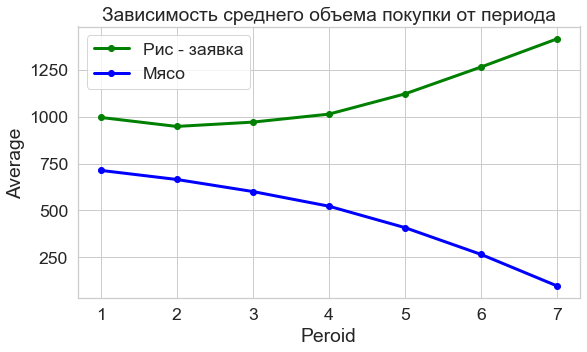

In [150]:
fig, ax = plt.subplots(1,figsize=(9, 5))

ax.plot(range(1, 8), g0_analysis.iloc[0:, 1].values, 'o-', color = 'green', linewidth = 3,  label = 'Рис - заявка')
ax.plot(range(1, 8), g0_analysis.iloc[0:, 2].values, 'o-', color = 'blue', linewidth = 3, label = 'Мясо')

ax.set_ylabel(ylabel = 'Average')
ax.set_xlabel(xlabel = 'Peroid')
ax.set_title(label = "Зависимость среднего объема покупки от периода")

plt.legend()
plt.plot()


[]

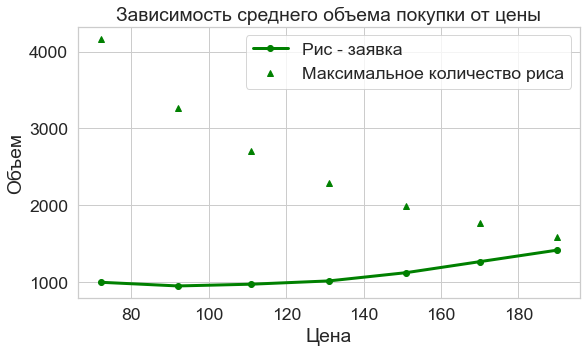

In [163]:
fig, ax = plt.subplots(1,figsize=(9, 5))

ax.plot(g0_analysis.iloc[0:, 3], g0_analysis.iloc[0:, 1].values, 
        'o-', color = 'green', linewidth = 3,  label = 'Рис - заявка')
ax.plot(g0_analysis.iloc[0:, 3], g0_analysis.iloc[0:, 4].values, 
        '^', color = 'green', linewidth = 3, label = 'Максимальное количество риса')

ax.set_ylabel(ylabel = 'Объем')
ax.set_xlabel(xlabel = 'Цена')
ax.set_title(label = "Зависимость среднего объема покупки от цены")

plt.legend()
plt.plot()

##   Гиффен 1

In [152]:
data1 = pd.read_excel('Data_1.xlsx', sheet_name = 0)
description1 = pd.read_excel('Data_1.xlsx', sheet_name = 1)

No handles with labels found to put in legend.


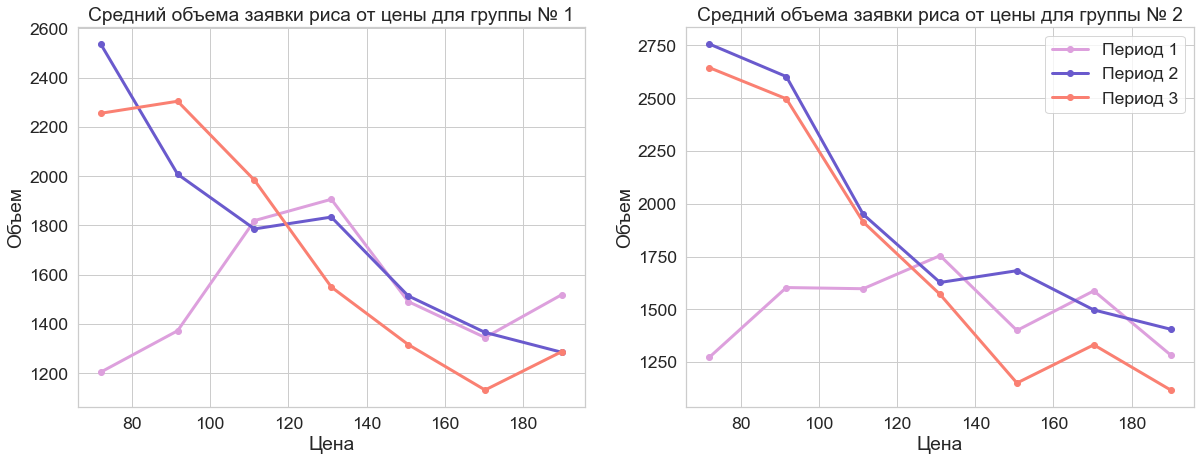

In [165]:
person_data_even = data1.loc[(data1['participant.id_in_session']% 2 == 0)]
person_data_odd = data1.loc[(data1['participant.id_in_session']% 2 == 1)]
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
PlotForGroup(person_data_even, 0, 21)
PlotForGroup(person_data_odd, 1, 21)

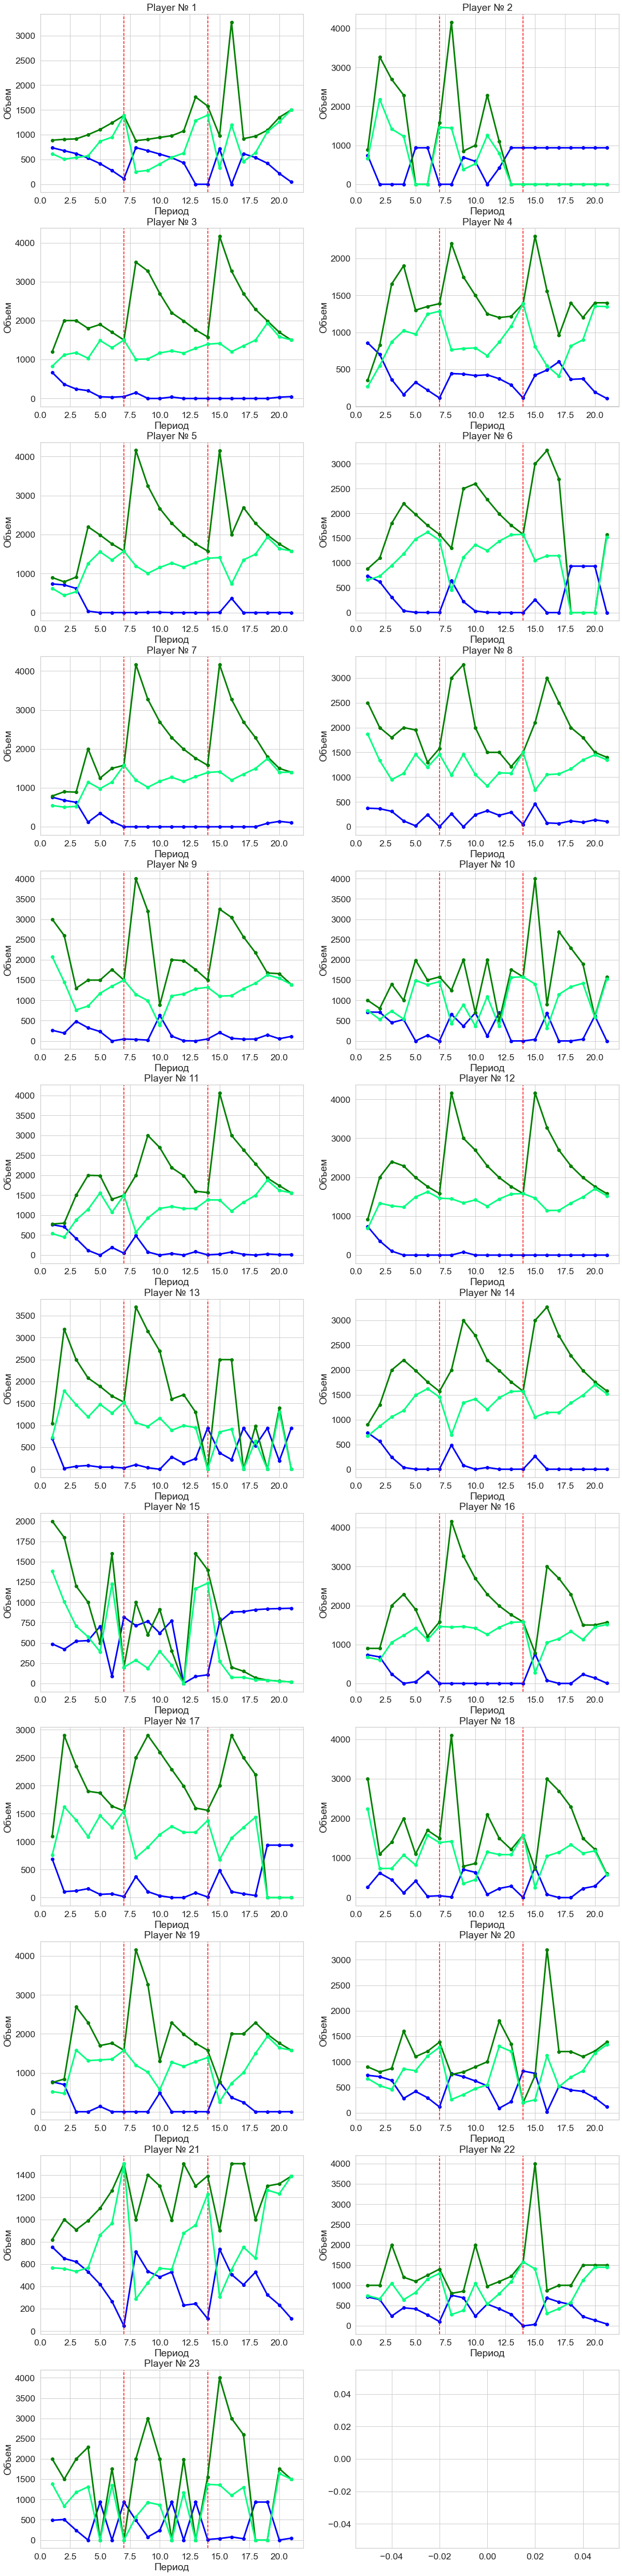

In [221]:
fig, ax = plt.subplots(12, 2, figsize=(20, 90))
for player_num in range(1, 24):
    PlotForPlayer(data1, player_num, 21, 2)


#  Гиффен 2

In [31]:
data2 = pd.read_excel('Data_2.xlsx', sheet_name = 0)
description2 = pd.read_excel('Data_2.xlsx', sheet_name = 1)

[]

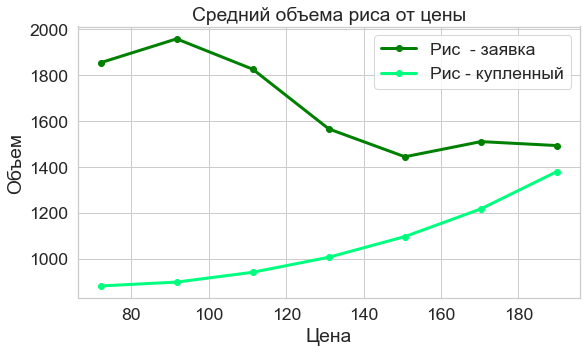

In [183]:
fig, ax = plt.subplots(1,figsize=(9, 5))
g2_analysis = pd.DataFrame(index = range(7), columns=['round_num', 'player.x_rice', 'player.x_meat', 'group.p_rice', 
                                                          'player.x_rice_actual'])

for round_num in range(1, 8):
    period = data2.loc[(data2['subsession.round_number'] == round_num)]

    g2_analysis.loc[round_num-1, 'round_num'] = 'round_num {0}'.format(round_num)
    g2_analysis.iloc[round_num-1, 1] = GetAverage(period, 'player.x_rice') 
    g2_analysis.iloc[round_num-1, 2] = GetAverage(period, 'player.x_meat') 
    g2_analysis.iloc[round_num-1, 3] = GetAverage(period, 'group.p_rice')
    g2_analysis.iloc[round_num-1, 4] = GetAverage(period, 'player.x_rice_actual')

ax.plot(g2_analysis.iloc[0:, 3], g2_analysis.iloc[0:, 1].values, 'o-', color = 'green', linewidth = 3,  label = 'Рис  - заявка')
ax.plot(g2_analysis.iloc[0:, 3], g2_analysis.iloc[0:, 4].values, 'o-', color = 'springgreen', linewidth = 3,  label = 'Рис - купленный')

ax.set_ylabel(ylabel = 'Объем')
ax.set_xlabel(xlabel = 'Цена')
ax.set_title(label = 'Cредний объема риса от цены')

plt.legend()
plt.plot()

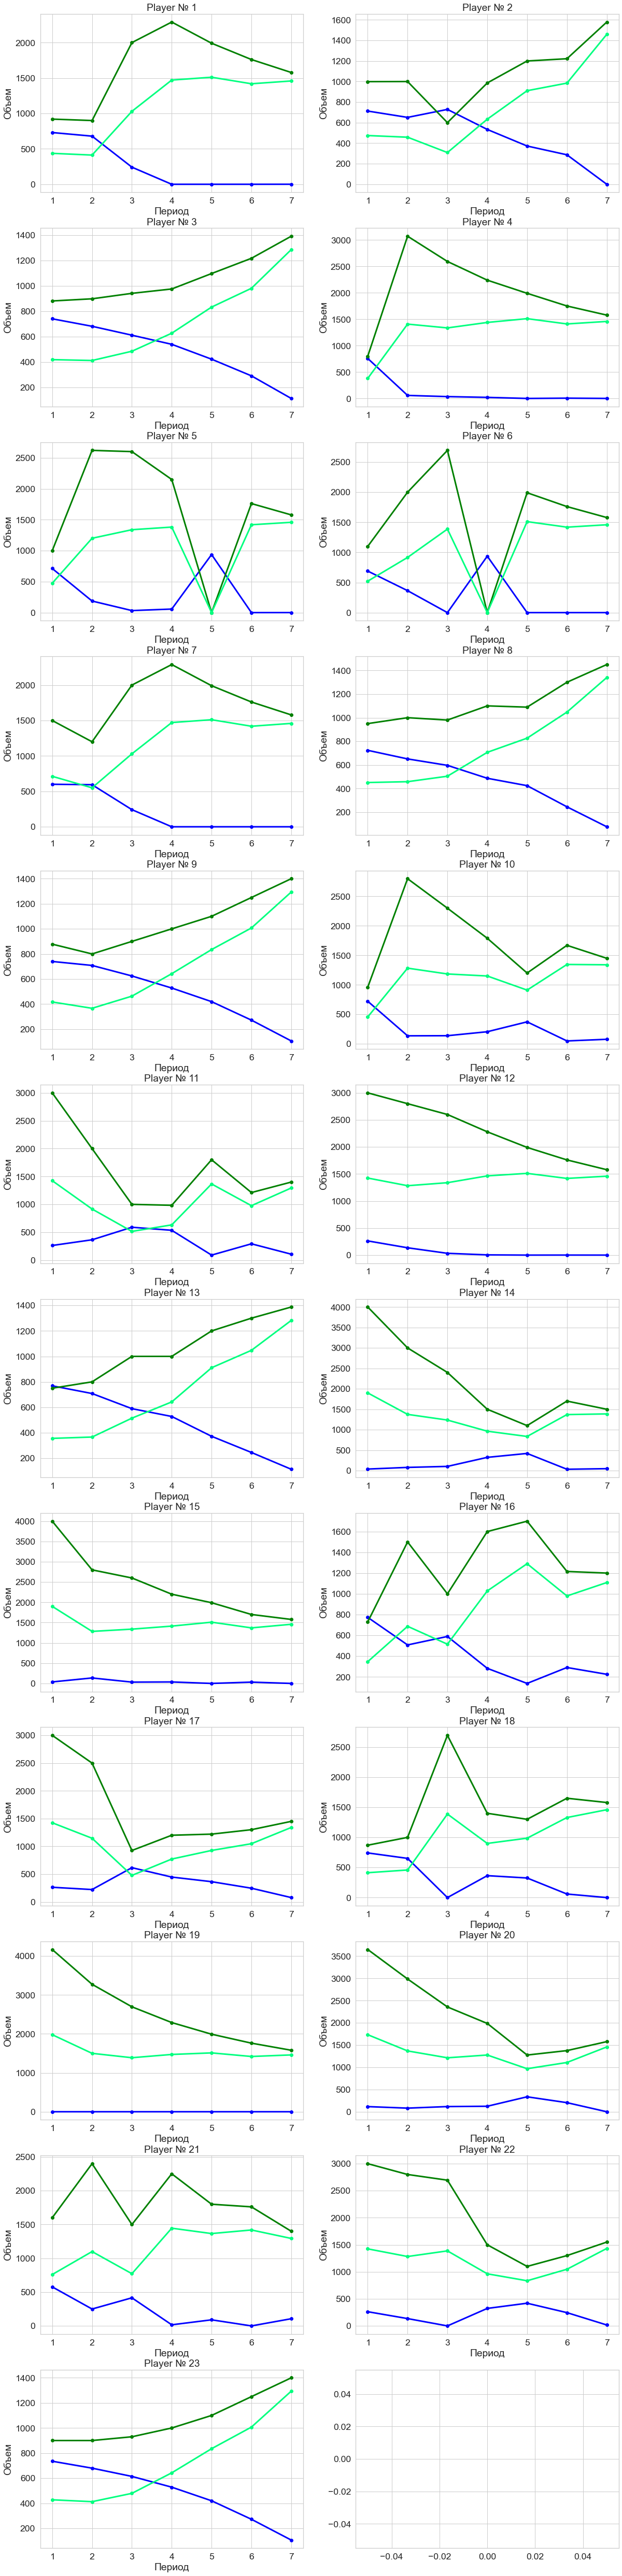

In [222]:
fig, ax = plt.subplots(12, 2, figsize=(20, 90))
for player_num in range(1, 24):
    PlotForPlayer(data2, player_num, 7, 2)

#  Гиффен 3

In [184]:
data3 = pd.read_excel('Data_3.xlsx', sheet_name = 0)
description3 = pd.read_excel('Data_3.xlsx', sheet_name = 1)

[]

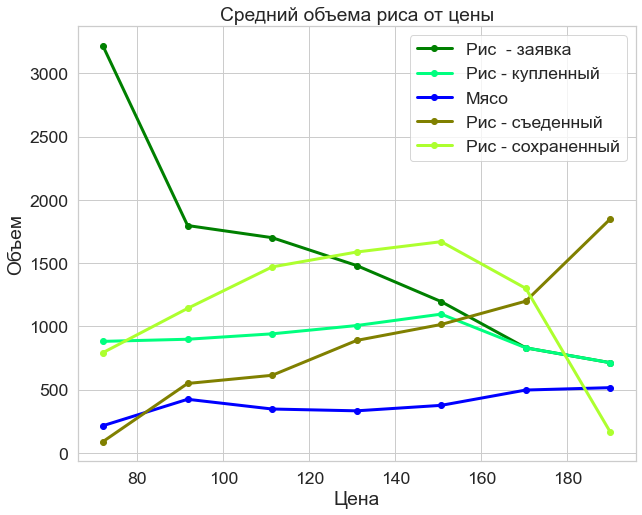

In [193]:
fig, ax = plt.subplots(1,figsize=(10, 8))
g3_analysis = pd.DataFrame(index = range(7), columns=['round_num', 'player.x_rice_bought', 'player.x_meat', 'group.p_rice', 
                                                          'player.x_rice_actual', 'player.x_rice_ate_d', 'player.x_rice_saved' ])

for round_num in range(1, 8):
    period = data3.loc[(data3['subsession.round_number'] == round_num)]
    num = round_num-1
    g3_analysis.loc[num, 'round_num'] = 'round_num {0}'.format(round_num)
    g3_analysis.iloc[num, 1] = GetAverage(period, 'player.x_rice_bought') 
    g3_analysis.iloc[num, 2] = GetAverage(period, 'player.x_meat') 
    g3_analysis.iloc[num, 3] = GetAverage(period, 'group.p_rice')
    g3_analysis.iloc[num, 4] = GetAverage(period, 'player.x_rice_actual')
    g3_analysis.iloc[num, 5] = GetAverage(period, 'player.x_rice_ate_d')
    g3_analysis.iloc[num, 6] = GetAverage(period, 'player.x_rice_saved')

ax.plot(g3_analysis.iloc[0:, 3], g3_analysis.iloc[0:, 1].values, 'o-', color = 'green', linewidth = 3,  label = 'Рис  - заявка')
ax.plot(g3_analysis.iloc[0:, 3], g3_analysis.iloc[0:, 4].values, 'o-', color = 'springgreen', linewidth = 3,  label = 'Рис - купленный')
ax.plot(g3_analysis.iloc[0:, 3], g3_analysis.iloc[0:, 2].values, 'o-', color = 'blue', linewidth = 3,  label = 'Мясо')
ax.plot(g3_analysis.iloc[0:, 3], g3_analysis.iloc[0:, 5].values, 'o-', color = 'olive', linewidth = 3,  label = 'Рис - съеденный')
ax.plot(g3_analysis.iloc[0:, 3], g3_analysis.iloc[0:, 6].values, 'o-', color = 'greenyellow', linewidth = 3,  label = 'Рис - сохраненный')

ax.set_ylabel(ylabel = 'Объем')
ax.set_xlabel(xlabel = 'Цена')
ax.set_title(label = 'Cредний объема риса от цены')

plt.legend()
plt.plot()

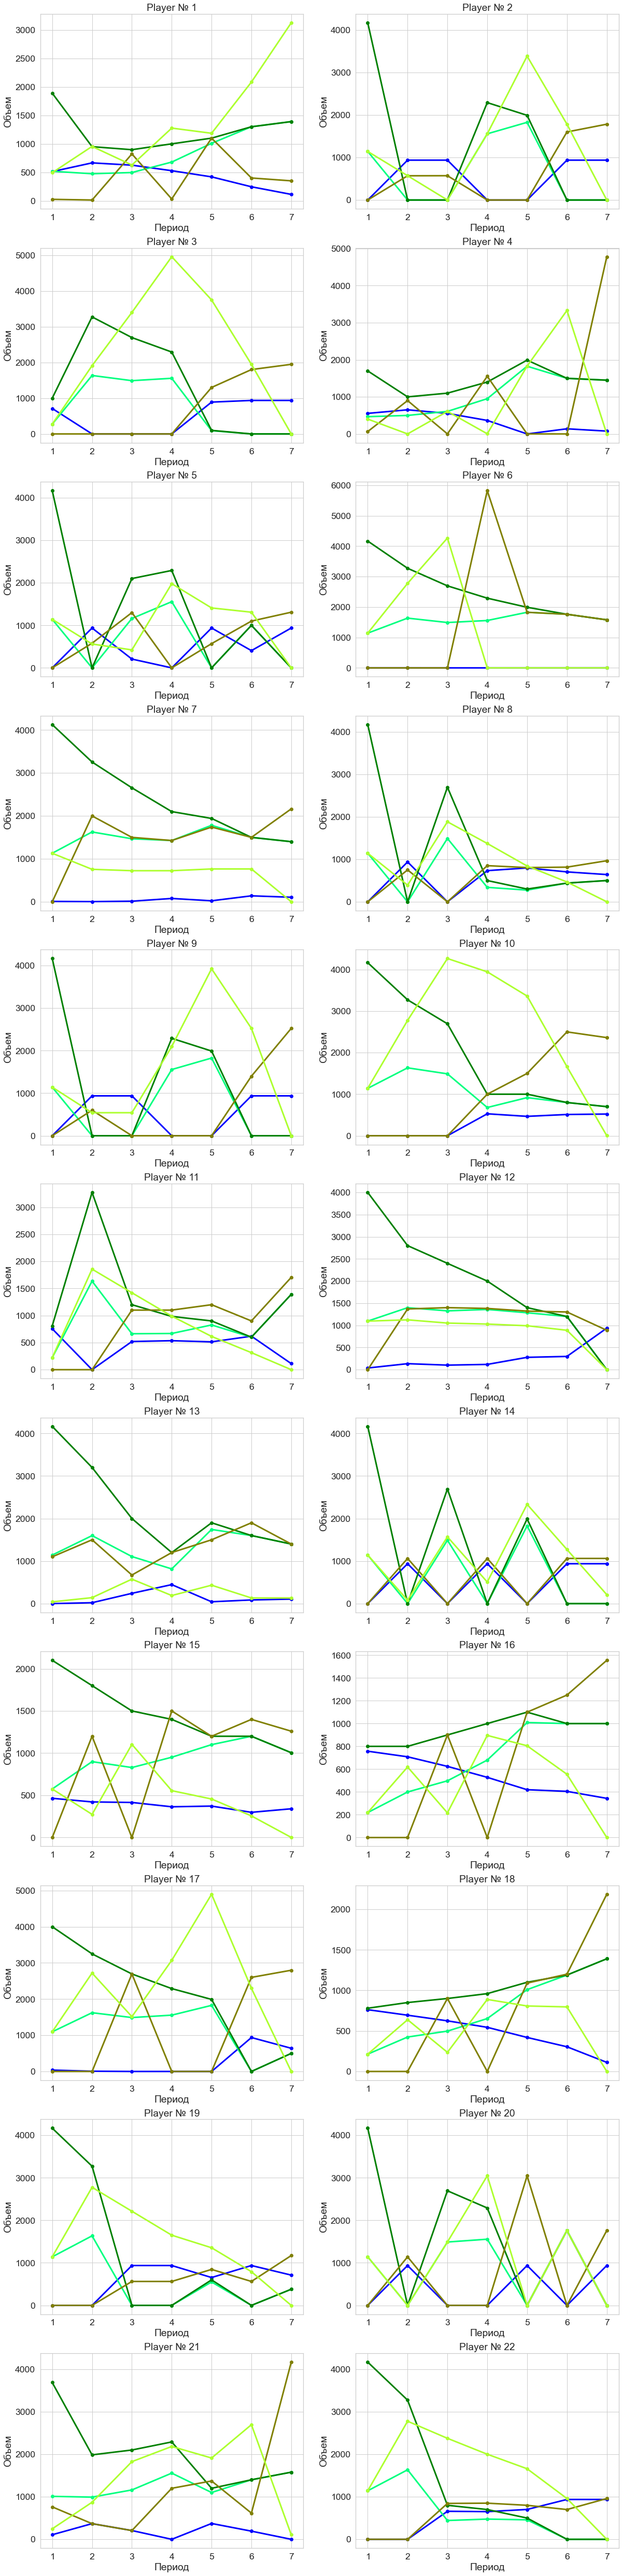

In [216]:
fig, ax = plt.subplots(11, 2, figsize=(20, 90))
for player_num in range(1, 23):
    PlotForPlayer(data3, player_num, 7, 3)

#  Гиффен 4

In [50]:
data4 = pd.read_excel('Data_4.xlsx', sheet_name = 0)
description4 = pd.read_excel('Data_4.xlsx', sheet_name = 1)

[]

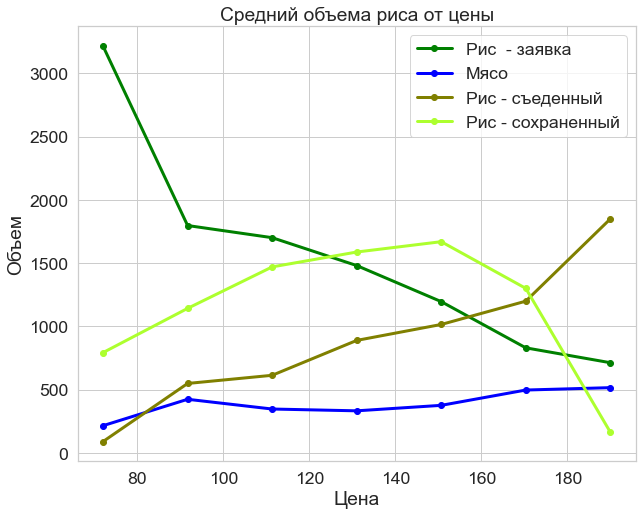

In [219]:
fig, ax = plt.subplots(1,figsize=(10, 8))
g4_analysis = pd.DataFrame(index = range(7), columns=['round_num', 'player.x_rice_bought', 'player.x_meat', 'group.p_rice', 
                                                          'player.x_rice_actual', 'player.x_rice_ate_d', 'player.x_rice_saved' ])

for round_num in range(1, 8):
    period = data3.loc[(data3['subsession.round_number'] == round_num)]
    num = round_num-1
    g4_analysis.loc[num, 'round_num'] = 'round_num {0}'.format(round_num)
    g4_analysis.iloc[num, 1] = GetAverage(period, 'player.x_rice_bought') 
    g4_analysis.iloc[num, 2] = GetAverage(period, 'player.x_meat') 
    g4_analysis.iloc[num, 3] = GetAverage(period, 'group.p_rice')
    g4_analysis.iloc[num, 4] = 0
    g4_analysis.iloc[num, 5] = GetAverage(period, 'player.x_rice_ate_d')
    g4_analysis.iloc[num, 6] = GetAverage(period, 'player.x_rice_saved')

ax.plot(g4_analysis.iloc[0:, 3], g4_analysis.iloc[0:, 1].values, 'o-', color = 'green', linewidth = 3,  label = 'Рис  - заявка')
ax.plot(g4_analysis.iloc[0:, 3], g4_analysis.iloc[0:, 2].values, 'o-', color = 'blue', linewidth = 3,  label = 'Мясо')
ax.plot(g4_analysis.iloc[0:, 3], g4_analysis.iloc[0:, 5].values, 'o-', color = 'olive', linewidth = 3,  label = 'Рис - съеденный')
ax.plot(g4_analysis.iloc[0:, 3], g4_analysis.iloc[0:, 6].values, 'o-', color = 'greenyellow', linewidth = 3,  label = 'Рис - сохраненный')

ax.set_ylabel(ylabel = 'Объем')
ax.set_xlabel(xlabel = 'Цена')
ax.set_title(label = 'Cредний объема риса от цены')

plt.legend()
plt.plot()

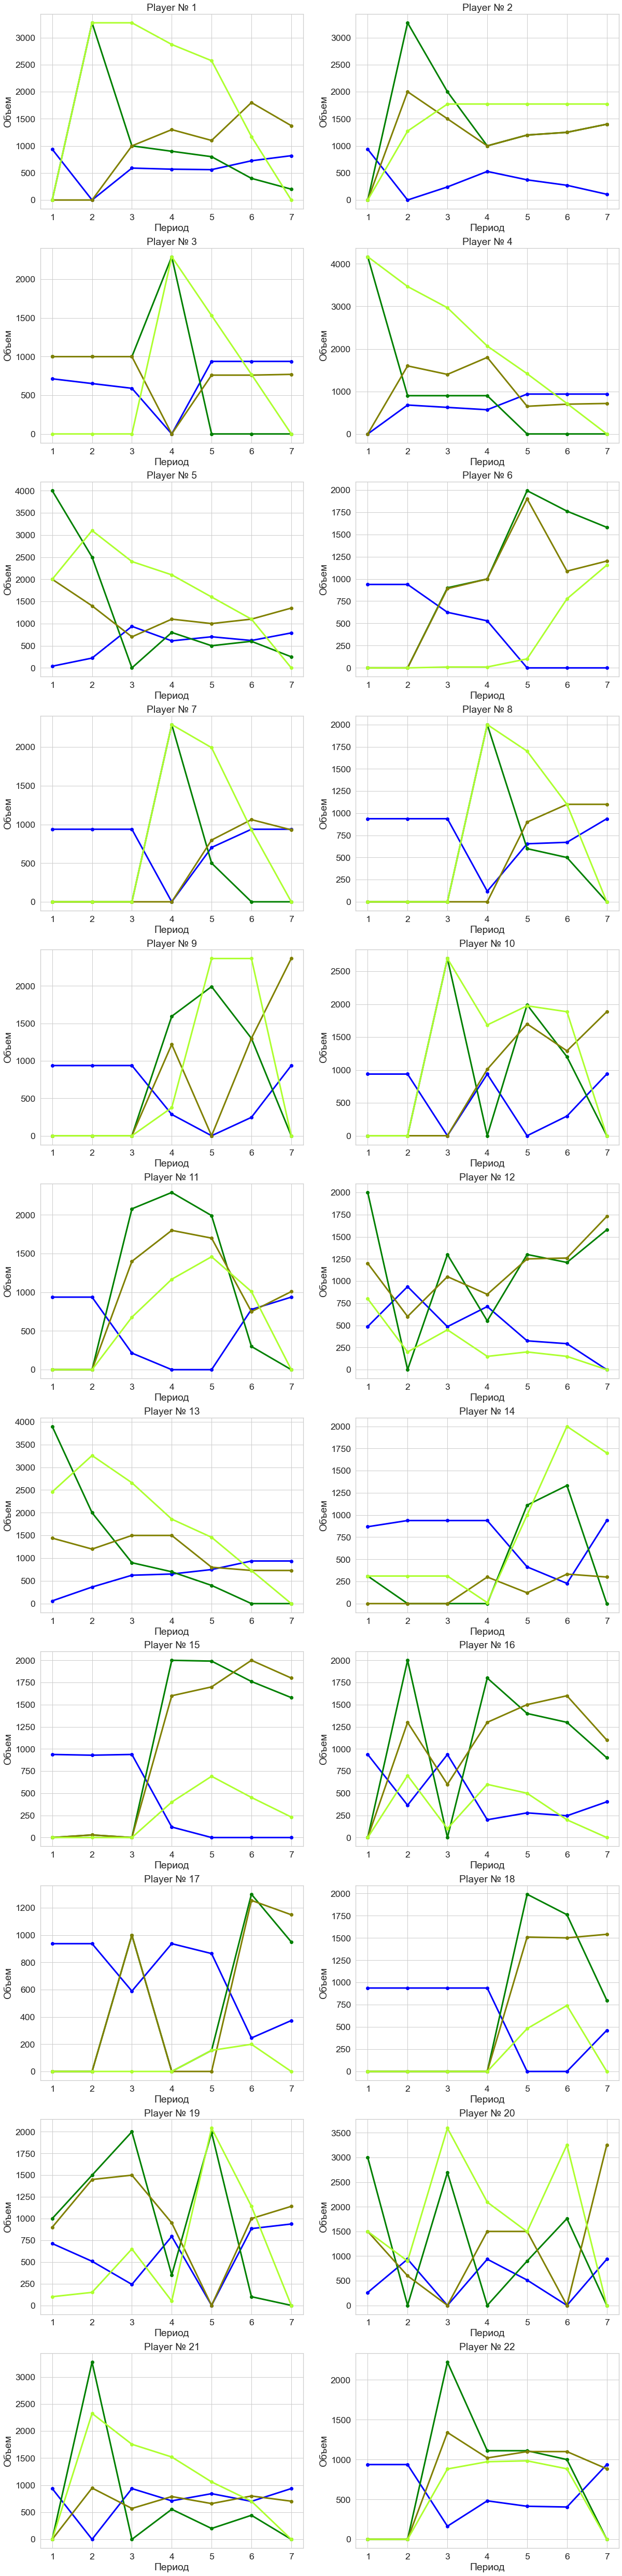

In [225]:
fig, ax = plt.subplots(11, 2, figsize=(20, 90))
for player_num in range(1, 23):
    PlotForPlayer(data4, player_num, 7, 4)